[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


📊 Classification Report:
              precision    recall  f1-score   support

    negative       0.98      0.91      0.95       161
    positive       0.93      0.98      0.96       193

    accuracy                           0.95       354
   macro avg       0.96      0.95      0.95       354
weighted avg       0.95      0.95      0.95       354



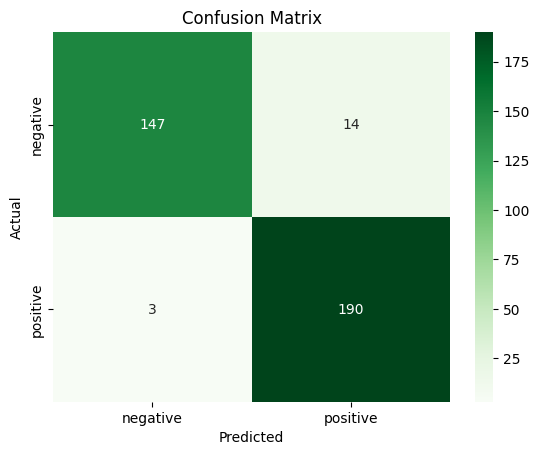

In [ ]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Step 2: Load dataset with valid categories
categories = ['rec.sport.baseball', 'talk.politics.misc']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

# Step 3: Convert to DataFrame
df = pd.DataFrame({
    'text': newsgroups.data,
    'target': newsgroups.target
})

# Simulate sentiment (0 = positive, 1 = negative)
label_map = {0: 'positive', 1: 'negative'}
df['sentiment'] = df['target'].map(label_map)

# Step 4: Clean the text
def clean_text(text):
    text = re.sub(r"http\S+|@\w+|#\w+", '', text)  # remove links, mentions, hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text).lower()  # remove special chars, lowercase
    words = [word for word in text.split() if word not in stop_words]
    return " ".join(words)

df['clean_text'] = df['text'].apply(clean_text)

# Step 5: Feature extraction with TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text'])
y = df['sentiment']

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Step 8: Predict and Evaluate
y_pred = model.predict(X_test)
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Step 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Here we have perfomed the sentiment analysis of 20 NewsGroups Headlines